In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'C:\\Users\\Adminr\\PycharmProjects\\CardioVascularDisease'

In [3]:
!python --version


Python 3.6.10 :: Anaconda, Inc.


# reading the data

In [4]:

data=pd.read_csv(r"D:\INEURON\CardioVascularDisease\cardio_train.csv",sep=";")

In [5]:
data1=data.iloc[:,2:]
data1.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1,155,69.0,130,80,2,2,0,0,1,0
1,1,163,71.0,110,70,1,1,0,0,1,1
2,1,165,70.0,120,80,1,1,0,0,1,0
3,2,165,85.0,120,80,1,1,1,1,1,0
4,1,155,62.0,120,80,1,1,0,0,1,0


In [6]:
data1.to_csv('cardio_train_new.csv',index=False)

In [7]:
x=pd.read_csv(r"C:\Users\Adminr\PycharmProjects\CardioVascularDisease\cardio_train_new.csv")
x.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1,155,69.0,130,80,2,2,0,0,1,0
1,1,163,71.0,110,70,1,1,0,0,1,1
2,1,165,70.0,120,80,1,1,0,0,1,0
3,2,165,85.0,120,80,1,1,1,1,1,0
4,1,155,62.0,120,80,1,1,0,0,1,0


# shape of data 

In [8]:
data.shape

(69301, 13)

In [9]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [10]:
def copy_csv(filename):
    import pandas as pd
    df = pd.read_csv('cardio_train.csv')
    data.to_csv('copy_of_' + 'file.csv')
copy_csv('cardio_train.csv')

# Null values and duplicate values

In [11]:
print(data.isnull().sum().sum())
print(data.duplicated().sum())

0
0


In [12]:
print(data.columns)
print(data.dtypes)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


# Target var (cardio)

In [13]:
from collections import Counter as c
print(np.unique(data['cardio'],return_counts=True))
c(data.cardio)

(array([0, 1], dtype=int64), array([34679, 34622], dtype=int64))


Counter({0: 34679, 1: 34622})

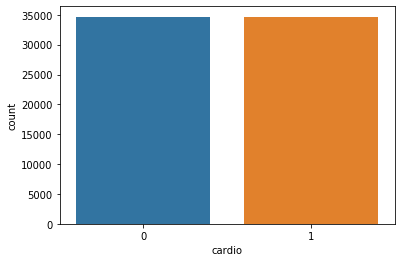

In [14]:
sns.countplot(data.cardio)

# Age

In [15]:

data['age']=(data['age']/365).round().astype('int')
#round(data['age'],4)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,62,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60,1,165,70.0,120,80,1,1,0,0,1,0
3,991,40,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64,1,155,62.0,120,80,1,1,0,0,1,0


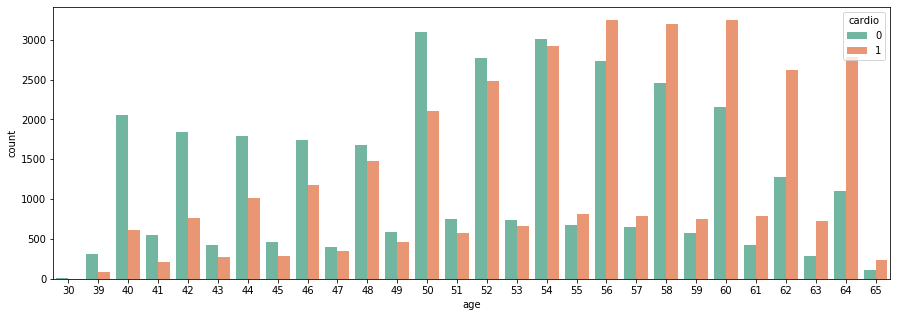

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', hue='cardio', data = data, palette="Set2");

In [17]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,53.338177,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,6.765427,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Observing all the other categorical variables

In [18]:
val_list=['gender','cholesterol', 'gluc', 'smoke', 'alco', 'active']
melted=pd.melt(data,id_vars='cardio',value_vars=val_list)
melted

,cardio,variable,value
0,0,gender,1
1,1,gender,1
2,0,gender,1
3,0,gender,2
4,0,gender,1
...,...,...,...
415801,0,active,1
415802,1,active,1
415803,1,active,0
415804,1,active,0


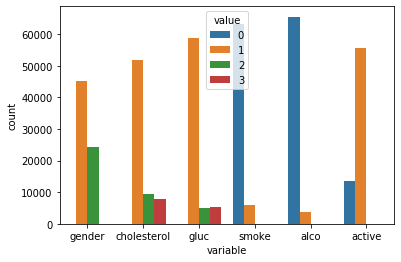

In [19]:
sns.countplot(x="variable", hue="value",data=melted)

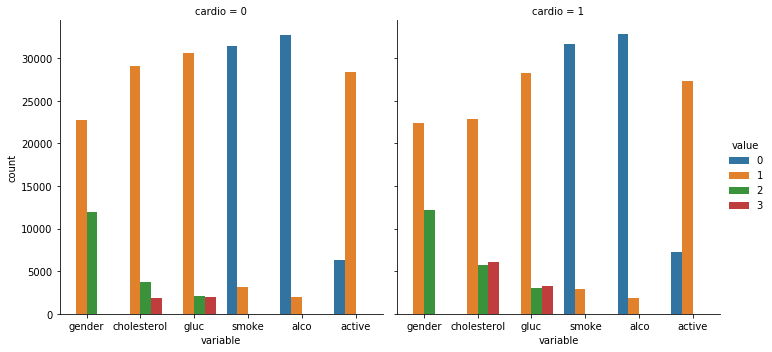

In [20]:
sns.catplot(x="variable", hue="value", col="cardio",
                data=melted, kind="count")

# weight

In [21]:
data['weight'].sort_values()#.head()

57159     10.0
33118     11.0
59489     21.0
28789     22.0
26107     23.0
         ...  
59893    180.0
44679    180.0
36081    181.0
60586    183.0
49714    200.0
Name: weight, Length: 69301, dtype: float64

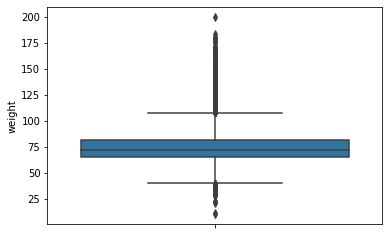

In [22]:
sns.boxplot(data.weight,orient='v')

In [23]:
Q3 = data['weight'].quantile(q=0.75)
Q1 = data['weight'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
UL = Q3 + (1.5 * IQR)
print("upper limit : ",UL)
LL = Q1 - (1.5 * IQR)
print("lower limit : ",LL)

17.0
upper limit :  107.5
lower limit :  39.5


In [24]:
print(data.weight[data['weight'] < data['weight'].quantile(0.025)].max())
print(data.weight[data['weight'] > data['weight'].quantile(0.975)].min())

50.7
109.0


In [25]:

data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index,inplace=True)

In [26]:
data.weight.max()

108.0

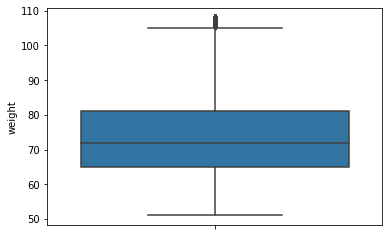

In [27]:
sns.boxplot(data.weight,orient='v')

# height

In [28]:
data.height.sort_values()

22024     55
65944     57
63416     59
28458     60
26904     64
        ... 
29539    198
418      198
41202    200
20929    207
5787     250
Name: height, Length: 66231, dtype: int64

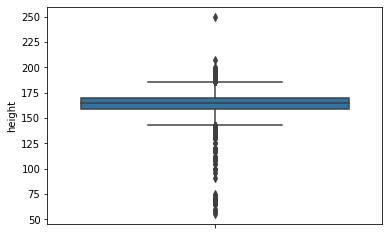

In [29]:
sns.boxplot(data.height,orient='v')

In [30]:

Q3 = data['height'].quantile(q=0.75)
Q1 = data['height'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
UL = Q3 + (1.5 * IQR)
print("upper limit : ",UL)
LL = Q1 - (1.5 * IQR)
print("lower limit : ",LL)

11.0
upper limit :  186.5
lower limit :  142.5


In [31]:
print(data.height[data['height'] > data['height'].quantile(0.995)].min())
print(data.height[data['height'] < data['height'].quantile(0.025)].max())

186
149


In [32]:
data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index,inplace=True)

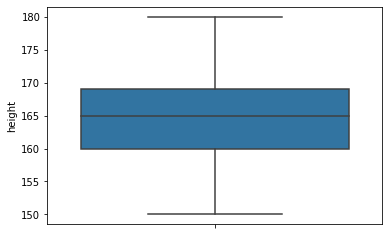

In [33]:
sns.boxplot(data.height,orient='v')

# Systolic blood pressure(ap_hi) and Diastolic blood pressure (ap_lo) 

In [34]:
"""plt.figure(figsize=(5,8))
plt.subplot(2,1,1)
sns.boxplot(data.ap_hi,orient='v')
plt.subplot(2,1,2)
sns.boxplot(data.ap_lo,orient='v')"""

"plt.figure(figsize=(5,8))\nplt.subplot(2,1,1)\nsns.boxplot(data.ap_hi,orient='v')\nplt.subplot(2,1,2)\nsns.boxplot(data.ap_lo,orient='v')"

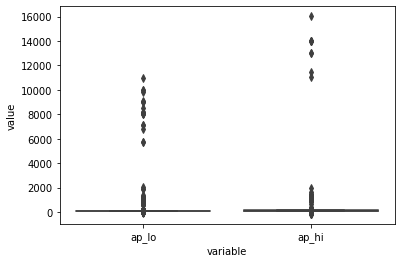

In [35]:
blood_pressure = data.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())

In [36]:
#ap_hi


Q3 = data['ap_hi'].quantile(q=0.75)
Q1 = data['ap_hi'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
UL = Q3 + (1.5 * IQR)
print("upper limit : ",UL)
LL = Q1 - (1.5 * IQR)
print("lower limit : ",LL)

20.0
upper limit :  170.0
lower limit :  90.0


In [37]:
print(data.ap_hi[data.ap_hi >data.ap_hi.quantile(0.975)].min())
print(data.ap_hi[data.ap_hi < data.ap_hi.quantile(0.025)].max())

165
99


In [38]:
#ap_hi


Q3 = data['ap_lo'].quantile(q=0.75)
Q1 = data['ap_lo'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
UL = Q3 + (1.5 * IQR)
print("upper limit : ",UL)
LL = Q1 - (1.5 * IQR)
print("lower limit : ",LL)

10.0
upper limit :  105.0
lower limit :  65.0


In [39]:

print(data.ap_lo[data.ap_lo >data.ap_lo.quantile(0.976)].min())
print(data.ap_lo[data.ap_lo <data.ap_lo.quantile(0.05)].max())

101
69


In [40]:
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.976)) | (data['ap_lo'] < data['ap_lo'].quantile(0.05))].index,inplace=True)

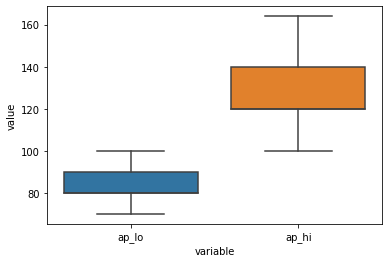

In [41]:
blood_pressure = data.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())

In [42]:
data["bmi"] = data["weight"]/ (data["height"]/100)**2

In [43]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,988,62,1,155,69.0,130,80,2,2,0,0,1,0,28.720083
1,989,40,1,163,71.0,110,70,1,1,0,0,1,1,26.722873
2,990,60,1,165,70.0,120,80,1,1,0,0,1,0,25.711662
3,991,40,2,165,85.0,120,80,1,1,1,1,1,0,31.221304
4,992,64,1,155,62.0,120,80,1,1,0,0,1,0,25.806452


In [44]:
# Splitting data into training and testing datasets
cols=['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active','bmi']
X = pd.DataFrame(data,columns=cols)
y = data['cardio']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

C:\Users\Adminr\PYTHON\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
y_pred_rfc = rfc.predict(X_test)
# Random Forest Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

[[6309 2466]
 [2671 5987]]
             precision    recall  f1-score   support

          0       0.70      0.72      0.71      8775
          1       0.71      0.69      0.70      8658

avg / total       0.71      0.71      0.71     17433



In [47]:
rfc.score(X_test, y_test)

0.7053289737853496

In [48]:
import xgboost as xgb
xgb.__version__

'0.90'

In [49]:
!pip install xgboost

^C


In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600,enable_experimental_json_serialization=True)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1,
       enable_experimental_json_serialization=True, gamma=0,
       learning_rate=0.02, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [51]:
y_pred_xgb = xgb.predict(X_test)

C:\Users\Adminr\PYTHON\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [52]:
print(f'Train Score: {xgb.score(X,y)}')

Train Score: 0.7303985681833827


C:\Users\Adminr\PYTHON\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [53]:
xgb.score(X_test, y_test)

C:\Users\Adminr\PYTHON\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7279871508059428

In [54]:
from sklearn.tree import DecisionTreeClassifier

dec = DecisionTreeClassifier()
dec.fit(X_train, y_train)
dec.score(X_test, y_test)

0.6324212700051626

In [61]:
import pickle
pickle.dump(xgb, open('cardio2.pickle','wb'))

# Loading model to compare the results
model1 = pickle.load(open('cardio2.json','rb'))

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)
print(f'Train Score: {log.score(X,y)}')
print(log.score(X_test,y_test))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
print(f'Train Score: {log.score(X,y)}')
print(log.score(X_test,y_test))